# Notes of Kalman Filter

Haiyang Yu, 2018-08-19

Contents:
- Introduction
- Derivation
- Examples

## Introduction

Target: get the best estimate of the system state, given the uncertainties in the system and observational process.

Method: minimum variance unbiased estimator (MVUE)

Kalman filter is a linear minimum variance of error filter over time-varying and time-invariant filters. It is the best linear filter over the class of all linear filters.

References:
+ https://www.youtube.com/watch?v=mwn8xhgNpFY
+ Pei et al., 2017: An Elementary Introduction to Kalman Filtering



## Derivation

<img src="./kf1.png">

- **Dynamic system and observation model**
$$ x_{k+1} = F x_k + G u_k + w_k $$
$$ z_k = H x_k + v_k$$

    Notation: 
    + $x_k$: system state vector at time k
    + $u_k$: input control vector at time k
    + $z_k$: observation vector at time k
    + $F$: state transition matrix
    + $G$: input control transition matrix
    + $H$: output transition matrix
    + $w_k$: process (or system, plant) noise vector, white noise $w$ ~ $N(0, Q)$
    + $v_k$: measurement noise vector, white noise $v$ ~ $N(0, R)$

<img src="./kf2.png">


- **Assumptions**

    + The process and measurement noise random processes $w$ and $v$ and uncorrelated;
    + The initial system state $x_0$ is a random vector that is uncorrelated to system and measurement noise processes;
    + The initial system state $x_0$ has known mean $\hat{x}_0$ and covariance matrix $P_0$.

- **Objective**
    + One-step-ahead prediction and variance:
    $$ \hat{x}_{k+1|k} = E(x_{k+1}|z_1, ..., z_k) = F E(x_k| z_1, ..., z_k) + G u _k + E(w_k|z_1, ..., z_k) = F \hat{x}_{k|k} + G u_k $$
    $$ P_{k+1|k} = E[(x_{k+1} - \hat{x}_{k+1|k})(x_{k+1} - \hat{x}_{k+1|k})^T|z_1, ..., z_k] = F P_{k|k} F^T + Q $$
    + The best estimator is a weighted average between prediction and observation
    $$\hat{x}_{k+1|k+1} = K'_{k+1}\hat{x}_{k+1|k} + K_{k+1} z_{k+1} $$
    + Target: minimize the conditional mean squared estimation error:
    $$ \epsilon = Var[\hat{x}_{k+1|k+1} - x_{k+1}] $$

- **The unbiased condition**
$$ E(\hat{x}_{k+1|k+1}) = E(x_{k+1})$$
$$ E(\hat{x}_{k+1|k+1}) = (K'_{k+1} + K_{k+1} H) E(x_{k+1}) $$
$$ K'_{k+1} + K_{k+1} H = I$$

$$ \hat{x}_{k+1|k+1} = \hat{x}_{k+1|k} + K_{k+1} [z_{k+1} - H \hat{x}_{k+1|k}] $$
Where K is called Kalman gain.

- **Error covariance**

$$ P_{k+1|k+1} = E((x_{k+1}-\hat{x}_{k+1|k+1})(x_{k+1}-\hat{x}_{k+1|k+1})^T) \\
 = (I-K_{k+1}H)P_{k+1|k}(I-K_{k+1}H)^T + K_{k+1}RK_{k+1}^T $$

- **Kalman Gain**

$$ L = \min_{K_{k+1}} {trace(P_{k+1|k+1})} $$

$$ \frac{\partial L}{\partial K_{k+1}} = 0 $$ 

$$ K_{k+1} = \frac{P_{k+1|k}H^T}{HP_{k+1|k}H^T + R} $$

where, we have used the rule:
$$ \frac{\partial }{\partial A} (trace(ABA^T)) = 2AB $$

- **Summary**

    + prediction

    $$ \hat{x}_{k+1|k} = F \hat{x}_{k|k} + G u_k $$

    $$ P_{k+1|k} = F P_{k|k} F^T + Q $$
    
    + update

    $$ \hat{x}_{k+1|k+1} = \hat{x}_{k+1|k} + K_{k+1} [z_{k+1} - H \hat{x}_{k+1|k}] $$

    $$ P_{k+1|k+1} = (I-K_{k+1}H)P_{k+1|k}(I-K_{k+1}H)^T + K_{k+1}RK_{k+1}^T $$

    $$ K_{k+1} = \frac{P_{k+1|k}H^T}{HP_{k+1|k}H^T + R} $$


## Example 1: 1D controlling dynamic system

+ Physical states:
$$ \vec{x} = [position, velocity]^T $$
+ State transition matrix:
$$ F = [[1, \Delta t], [0, 1]] $$
+ Input control transition matrix:
$$ G = [[0, \frac{1}{2} \Delta t^2], [0, \Delta t]] $$
+ Observation transition matrix:
$$ H = [[1, 0], [0, 1]] $$


In [1]:
import numpy as np
import matplotlib 
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mc
import os

from mod_kf import *

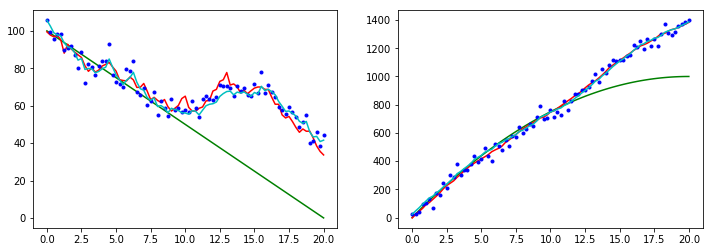

In [3]:
time, ideal, gt, obs, kf = simulation_1d(xinit = np.array([0, 100]), \
        fcontrol = control_1d_constant, endtime=20, dtime=0.25, \
        syscov = np.array([[20,4], [4,7]]), obscov = np.array([[1000, 10], [10, 25]]))
    
plt.figure(1, figsize=(12, 4))
plt.subplot(1,2,1); plt.plot(time, ideal[:,1], 'g', time, gt[:,1], 'r', time, obs[:,1], 'b.', time, kf[:,1], 'c')
plt.subplot(1,2,2); plt.plot(time, ideal[:,0], 'g', time, gt[:,0], 'r', time, obs[:,0], 'b.', time, kf[:,0], 'c')
plt.show()

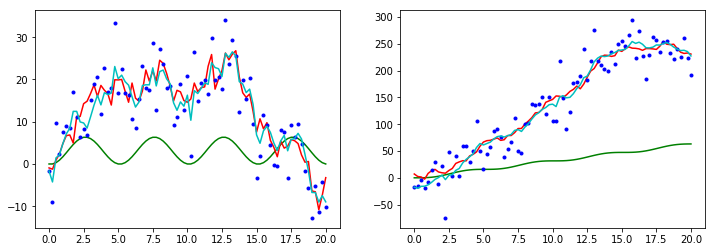

In [4]:
time, ideal, gt, obs, kf = simulation_1d(xinit = np.array([0, 0]), \
        fcontrol = control_1d_sintime, endtime=20, dtime=0.25, \
        syscov = np.array([[20,4], [4,7]]), obscov = np.array([[1000, 10], [10, 25]]))
    
plt.figure(1, figsize=(12, 4))
plt.subplot(1,2,1); plt.plot(time, ideal[:,1], 'g', time, gt[:,1], 'r', time, obs[:,1], 'b.', time, kf[:,1], 'c')
plt.subplot(1,2,2); plt.plot(time, ideal[:,0], 'g', time, gt[:,0], 'r', time, obs[:,0], 'b.', time, kf[:,0], 'c')
plt.show()

## Example 2: 2D controlling dynamic system

+ Physical states:
$$ \vec{x} = [x, y, v_x, v_y]^T $$


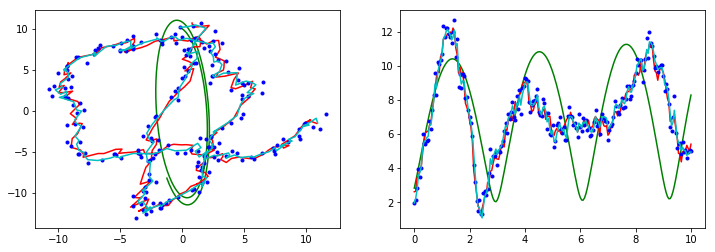

In [46]:
time, ideal, gt, obs, kf = simulation_2d(xinit = np.array([0, 10, 2, -2]), \
        fcontrol = control_2d_center, endtime=10, dtime=0.05, \
        syscov = np.array([[20, 15, 6, 6], 
                           [15, 20, 6, 6], 
                           [ 6,  6, 15, 4], 
                           [ 6,  6, 4, 15] ]) / 100.0, 
        obscov = np.array([[30, 20, 10, 10], 
                           [20, 30, 10, 10], 
                           [10, 10, 25,  7], 
                           [10, 10,  7, 25] ]) / 100.0)

plt.figure(1, figsize=(12, 4))
plt.subplot(1,2,1); plt.plot(ideal[:,0], ideal[:,1], 'g', gt[:,0], gt[:,1], 'r', \
                             obs[:,0], obs[:,1], 'b.', kf[:,0], kf[:,1], 'c')
plt.subplot(1,2,2); plt.plot(time, np.sqrt(ideal[:,2]**2+ideal[:,3]**2), 'g', \
                            time, np.sqrt(gt[:,2]**2+gt[:,3]**2), 'r', \
                            time, np.sqrt(obs[:,2]**2+obs[:,3]**2), 'b.', \
                            time, np.sqrt(kf[:,2]**2+kf[:,3]**2), 'c')
plt.show()


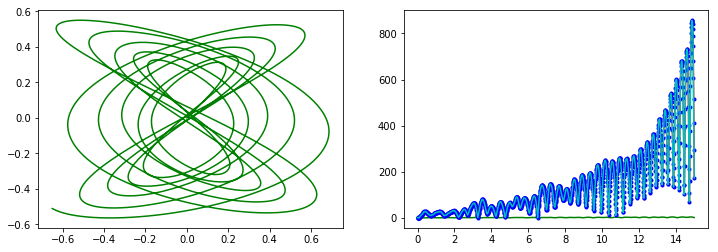

In [58]:
time, ideal, gt, obs, kf = simulation_2d(xinit = np.array([0, 0, 1, 1.15]), \
        fcontrol = control_2d_multiplecenters, endtime=15, dtime=0.01, \
        syscov = np.array([[20, 15, 6, 6], 
                           [15, 20, 6, 6], 
                           [ 6,  6, 15, 4], 
                           [ 6,  6, 4, 15] ]) / 100.0, 
        obscov = np.array([[30, 20, 10, 10], 
                           [20, 30, 10, 10], 
                           [10, 10, 25,  7], 
                           [10, 10,  7, 25] ]) / 100.0)

plt.figure(1, figsize=(12, 4))
plt.subplot(1,2,1); plt.plot(ideal[:,0], ideal[:,1], 'g')
#plt.subplot(1,2,1); plt.plot(ideal[:,0], ideal[:,1], 'g', gt[:,0], gt[:,1], 'r', \
#                             obs[:,0], obs[:,1], 'b.', kf[:,0], kf[:,1], 'c')
plt.subplot(1,2,2); plt.plot(time, np.sqrt(ideal[:,2]**2+ideal[:,3]**2), 'g', \
                            time, np.sqrt(gt[:,2]**2+gt[:,3]**2), 'r', \
                            time, np.sqrt(obs[:,2]**2+obs[:,3]**2), 'b.', \
                            time, np.sqrt(kf[:,2]**2+kf[:,3]**2), 'c')
plt.show()


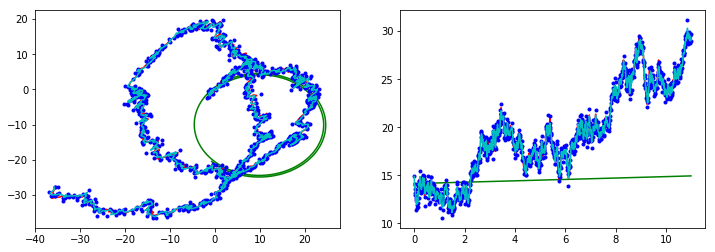

In [64]:
time, ideal, gt, obs, kf = simulation_2d(xinit = np.array([0, 0, 10, 10]), \
        fcontrol = control_2d_coriolis, endtime=11, dtime=0.01, \
        syscov = np.array([[20, 15, 6, 6], 
                           [15, 20, 6, 6], 
                           [ 6,  6, 15, 4], 
                           [ 6,  6, 4, 15] ]) / 100.0, 
        obscov = np.array([[30, 20, 10, 10], 
                           [20, 30, 10, 10], 
                           [10, 10, 25,  7], 
                           [10, 10,  7, 25] ]) / 100.0)

plt.figure(1, figsize=(12, 4))
plt.subplot(1,2,1); plt.plot(ideal[:,0], ideal[:,1], 'g', gt[:,0], gt[:,1], 'r', \
                             obs[:,0], obs[:,1], 'b.', kf[:,0], kf[:,1], 'c')
plt.subplot(1,2,2); plt.plot(time, np.sqrt(ideal[:,2]**2+ideal[:,3]**2), 'g', \
                            time, np.sqrt(gt[:,2]**2+gt[:,3]**2), 'r', \
                            time, np.sqrt(obs[:,2]**2+obs[:,3]**2), 'b.', \
                            time, np.sqrt(kf[:,2]**2+kf[:,3]**2), 'c')

plt.show()
